In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Kernel import RBF, RelevanceVectorClassifier

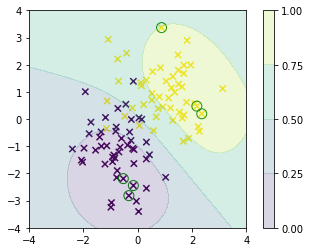

In [2]:
def create_data():
    x0 = np.random.normal(size=100).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=100).reshape(-1, 2) + 1.
    x = np.concatenate([x0, x1])
    t = np.concatenate([np.zeros(50), np.ones(50)]).astype(np.int)
    return x, t

np.random.seed(1234)
x_train, t_train = create_data()

model = RelevanceVectorClassifier(RBF(np.array([1., 0.5, 0.5])))
model.fit(x_train, t_train)

x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
t = model.predict_prob(x)

plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=t_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g") # Highlight relevance vectors
plt.contourf(x0, x1, t.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2) # probability of being classified to a group
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal", adjustable="box")